In [287]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


In [288]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [289]:
class LogisticRegression():

    def __init__(self,learning_rate = 0.001,n_iterations = 1000) :
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.Lambda = 2
        self.costs = []
    
    def propogate(self,X,y,isRegularized):
        n_samples,_ = X.shape
        linear_predictions = np.dot(X,self.weights) + self.bias
        a = sigmoid(linear_predictions)
        cost = -(1/n_samples)*np.sum(y*np.log(a) + (1-y)*np.log(1-a))
        dw = np.dot(X.T, (a - y)) * (1/n_samples)
        db = np.sum(a - y) * (1/n_samples)
        if isRegularized:
            regularization_cost = cost + (self.Lambda / (2*n_samples)) * np.sum(np.square(self.weights))
            refactored_dw = dw + (self.Lambda/n_samples) * np.sum(self.weights)
            refactored_db = db + (self.Lambda/n_samples) * np.sum(self.bias)
            current_grad = {"dw" : refactored_dw,"db":refactored_db}
            return current_grad,regularization_cost
        else:
            current_grad = {"dw" : dw,"db":db}
            return current_grad,cost

    def fit(self,X,y,show_cost,Lambda,isRegularized):
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.Lambda = Lambda

        for _ in range(self.n_iterations):
            grads,regularization_cost = self.propogate(X,y,isRegularized=isRegularized)
            dw = grads["dw"]
            db = grads["db"]
            self.weights -= self.learning_rate * dw
            self.bias  -= self.learning_rate*db
            np.squeeze(regularization_cost)
            if _ % 100 == 0:
                self.costs.append(regularization_cost)
                if show_cost and _ % 1000 == 0:
                    print("cost at iteration {}: {}".format(_,regularization_cost))

    def plotter(self):
        plt.plot(np.squeeze(self.costs))
        plt.ylabel('Cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate = " + str(self.learning_rate))
        plt.show()

    def predict(self,X) :
        linear_predictions = np.dot(X, self.weights) + self.bias
        y_predictions = sigmoid(linear_predictions)
        class_pred = [0 if y <=0.5 else 1 for y in y_predictions]
        return class_pred


In [290]:
def accuracy(y_pred,y_test):
    return np.sum(y_pred == y_test)/len(y_test)

In [291]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


## MinMax Scaler

$$X_{scaled} = {x - x_{min}\over x_{max}-x_{min}}$$

## Standard Scaler

$$X_{scaled} = {{x - μ}\over s}$$

In [292]:
scaler = preprocessing.StandardScaler()

In [293]:
df = pd.read_csv("heart_disease.csv")
X_df = df.drop( ["condition"],axis=1)
X_pre = scaler.fit_transform(X_df)
X = pd.DataFrame(X_pre, columns=df.columns[:-1])
y = df.get("condition")


# Non Regularized 

In [294]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)
clf = LogisticRegression(learning_rate=0.01,n_iterations=20000)
clf.fit(X_train,y_train,show_cost=True,Lambda=2,isRegularized=False)
y_pred = clf.predict(X_test)

cost at iteration 0: 0.6931471805599452
cost at iteration 1000: 0.37641215080253504
cost at iteration 2000: 0.36899300429218634
cost at iteration 3000: 0.3669279779911996
cost at iteration 4000: 0.3661109022038258
cost at iteration 5000: 0.3657461486067538
cost at iteration 6000: 0.36557335302350036
cost at iteration 7000: 0.36548860570045905
cost at iteration 8000: 0.3654461244890277
cost at iteration 9000: 0.36542452386542257
cost at iteration 10000: 0.36541343481520516
cost at iteration 11000: 0.36540770463168276
cost at iteration 12000: 0.3654047300726008
cost at iteration 13000: 0.3654031809970952
cost at iteration 14000: 0.3654023724271675
cost at iteration 15000: 0.36540194968253825
cost at iteration 16000: 0.36540172839508894
cost at iteration 17000: 0.36540161246054886
cost at iteration 18000: 0.3654015516827467
cost at iteration 19000: 0.3654015198055689


In [295]:
accuracy(y_pred,y_test)

0.8666666666666667

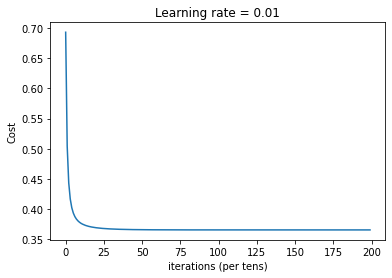

In [296]:
clf.plotter()

In [297]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.86        27

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



<AxesSubplot:>

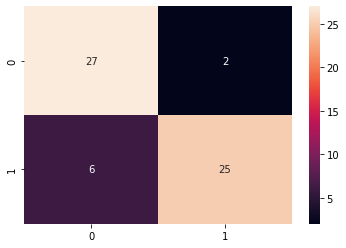

In [298]:

con_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(con_matrix, annot=True)

# Regularized (L2 Technique) 

In [299]:
clf_reg = LogisticRegression(learning_rate=0.01, n_iterations=20000)
clf_reg.fit(X_train, y_train, show_cost=True, Lambda=2, isRegularized=True)
y_pred_reg = clf_reg.predict(X_test)


cost at iteration 0: 0.6931471805599452
cost at iteration 1000: 0.3925333043249824
cost at iteration 2000: 0.3887532963840502
cost at iteration 3000: 0.3887573639761805
cost at iteration 4000: 0.3892072076162591
cost at iteration 5000: 0.3896217892235233
cost at iteration 6000: 0.38992837520265433
cost at iteration 7000: 0.39013894516670816
cost at iteration 8000: 0.3902789357787007
cost at iteration 9000: 0.3903705355815102
cost at iteration 10000: 0.3904300027744729
cost at iteration 11000: 0.39046847358894005
cost at iteration 12000: 0.39049333607252906
cost at iteration 13000: 0.39050941180223236
cost at iteration 14000: 0.39051982078174485
cost at iteration 15000: 0.39052657376479366
cost at iteration 16000: 0.3905309648133956
cost at iteration 17000: 0.3905338269574595
cost at iteration 18000: 0.3905356971390731
cost at iteration 19000: 0.3905369221257844


In [300]:
accuracy(y_pred_reg, y_test)


0.9166666666666666

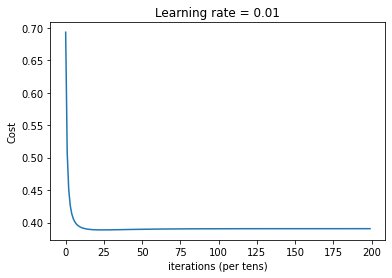

In [301]:
clf_reg.plotter()


In [302]:
print(classification_report(y_test, y_pred_reg))


              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.89      0.93      0.91        27

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



<AxesSubplot:>

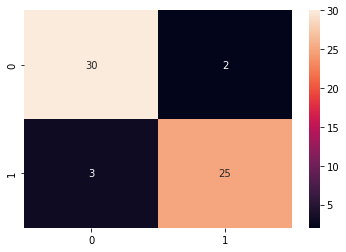

In [303]:
con_matrix = confusion_matrix(y_pred_reg, y_test)
sns.heatmap(con_matrix, annot=True)


## Sklearn Logistic Regression

In [326]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model._logistic import _logistic_loss


In [321]:
logClf = LR(penalty='none')
logClf.fit(X_train, y_train)
logPred = logClf.predict(X_test)


In [320]:
accuracy(logPred,y_test)

0.8666666666666667

In [323]:
print(classification_report(logPred, y_pred_reg))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       1.00      0.90      0.95        31

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



<AxesSubplot:>

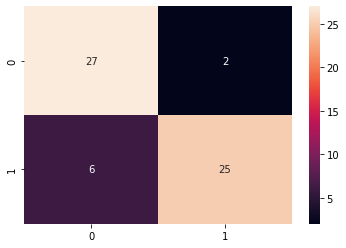

In [324]:
con_matrix = confusion_matrix(logPred, y_test)
sns.heatmap(con_matrix, annot=True)
